# Neural Networks - introduction

In [281]:
import functools
import time
import torch

T = torch.tensor

## Generate training data

In [396]:
train_xs = torch.linspace(-2, 2, 20)
train_xs_input = train_xs.unsqueeze(dim=0).T

In [492]:
def examples(xs):
    return torch.square(xs) - xs + torch.randn(xs.size())/5 + 1

In [586]:
train_ys = examples(train_xs)
train_ys_output = train_ys.unsqueeze(dim=1)

## Visualize training data

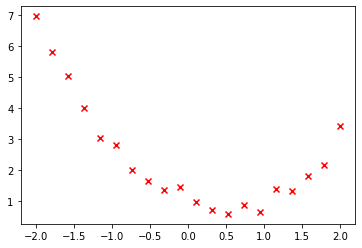

In [587]:
plt.scatter(train_xs, train_ys, marker='x', color='red')
plt.show()

## Piecewise approximation ("Neural network")

### Code

In [588]:
# Fonction qui ne retient que les valeurs positives
clamp_zero = functools.partial(torch.clamp, min=0)

# Approximation par des segments de droite
class NeuralNetwork:
    
    # Initialisation aléatoire des paramètres
    def __init__(self, num_segments):
    
        # - pentes des segments
        self.slopes = torch.randn(1, num_segments, requires_grad=True)
        # - ordonnées à l'origine des segments
        self.intercepts = torch.randn(1, num_segments, requires_grad=True) 
        # - minimum de la somme des segments
        self.offset = torch.randn(1, 1, requires_grad=True) 
        
        print(f"Initialized a model with {2*num_segments +1 } parameters")
        
        # Fonction qui additionne les segments
        self.sum = torch.ones(num_segments,1)
            
    # Prédiction des valeurs attendues par une courbe composée de segments de droite
    def predict_values(self, xs):

        # Calcul des segments
        segments = clamp_zero( xs @ self.slopes + self.intercepts )
        # Somme des segments
        preds = segments @ self.sum + self.offset
        
        return preds
        
    def measure_error(self, preds, ys):
    
        # Calcul de l'erreur de prédiction
        error = torch.sum(torch.abs(ys-preds))       
        
        return error
        
    # Ajustement des paramètres pour réduire l'erreur mesurée sur les exemples d'entrainement
    def adjust_parameters(self, error, step_size):
           
        # Calcul du sens dans lequel ajuster les paramètres
        error.backward()    
        with torch.no_grad():
            
            # Ajustement des paramètres pour réduire l'erreur
            self.slopes -= self.slopes.grad * step_size
            self.intercepts -= self.intercepts.grad * step_size
            self.offset -= self.offset.grad * step_size
            
            # Préparation pour l'itération suivante
            self.slopes.grad = None
            self.intercepts.grad = None
            self.offset.grad = None
            
    # Exécution du modèle entrainé
    def __call__(self, xs):
        with torch.no_grad():
            return self.predict_values(xs)
            
    # Visualisation du modèle sous forme de graphique
    def display(self, xs):
        preds = self(xs)
        plt.scatter(train_xs, train_ys, marker='x', color='red')
        plt.plot(xs, preds)
        plt.show()

In [589]:
xs = torch.linspace(min(train_xs), max(train_xs), 100).unsqueeze(dim=0).T

### Visualize approximations

Initialized a model with 3 parameters


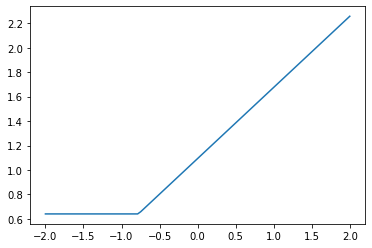

In [591]:
model = NeuralNetwork(num_segments = 1)
preds = model(xs)

plt.plot(xs, preds)
plt.show()

Initialized a model with 5 parameters


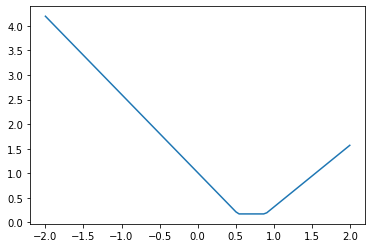

In [593]:
model = NeuralNetwork(num_segments = 2)
preds = model(xs)

plt.plot(xs, preds)
plt.show()

Initialized a model with 7 parameters


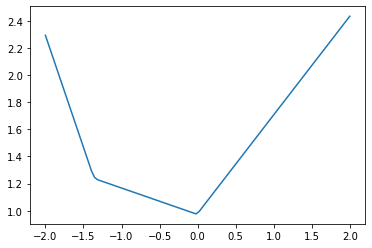

In [596]:
model = NeuralNetwork(num_segments = 3)
preds = model(xs)

plt.plot(xs, preds)
plt.show()

Initialized a model with 21 parameters


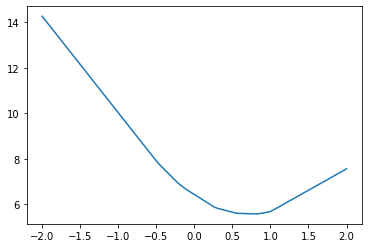

In [597]:
model = NeuralNetwork(num_segments = 10)
preds = model(xs)

plt.plot(xs, preds)
plt.show()

## Train a model with 200 parameters

In [628]:
model = NeuralNetwork(num_segments = 100)

Initialized a model with 201 parameters


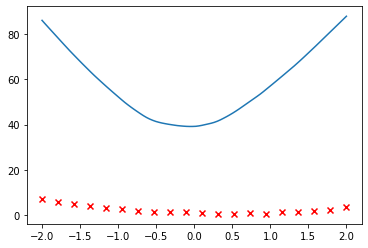

Error : 963.759521484375


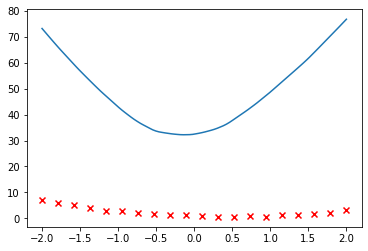

Error : 794.4339599609375


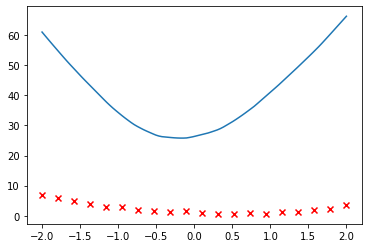

Error : 637.271484375


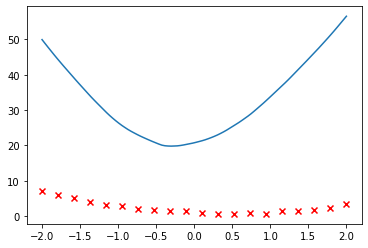

Error : 494.2226867675781


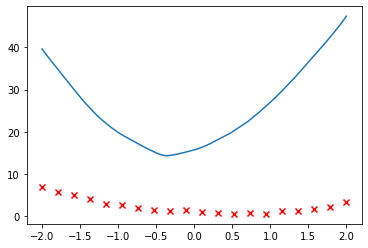

Error : 374.39996337890625


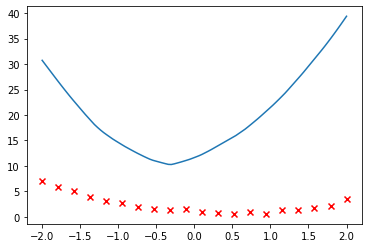

Error : 277.3255615234375


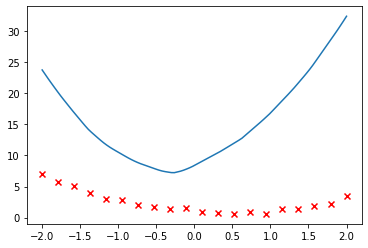

Error : 197.12916564941406


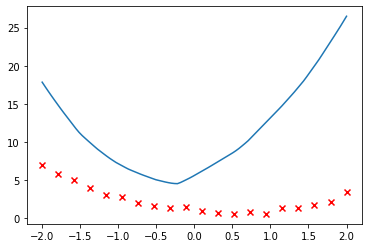

Error : 128.53379821777344


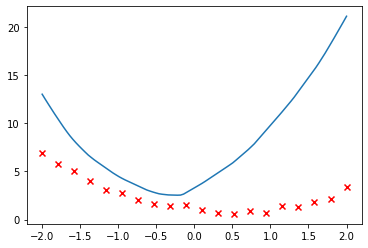

Error : 75.5635986328125


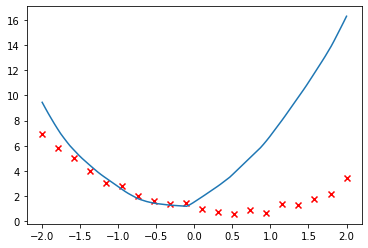

Error : 49.10218811035156


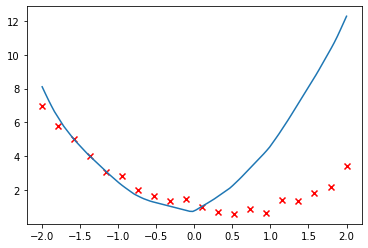

Error : 29.771821975708008
Error : 16.424041748046875
Error : 9.730314254760742
Error : 6.230123996734619
Error : 4.452232360839844
Error : 4.302321434020996
Error : 3.867311954498291
Error : 3.679476499557495
Error : 3.667754650115967
Error : 3.4093005657196045


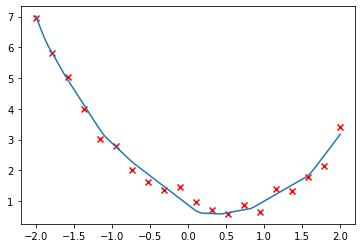

Error : 3.509376287460327
Error : 3.4255144596099854
Error : 3.2463760375976562
Error : 3.2191715240478516
Error : 3.125450372695923
Error : 3.0504090785980225
Error : 3.039729356765747
Error : 2.87082839012146
Error : 2.9075489044189453
Error : 3.0586297512054443


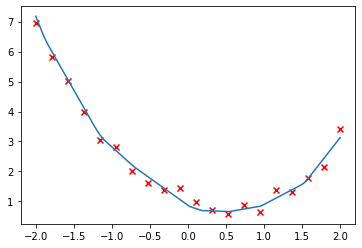

Error : 2.936081647872925
Error : 2.8731675148010254
Error : 2.8264150619506836
Error : 2.87605881690979
Error : 3.012601852416992
Error : 3.1036853790283203
Error : 2.959756851196289
Error : 3.024030923843384
Error : 2.9706063270568848
Error : 2.8425769805908203


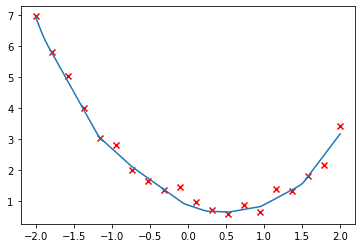

Error : 3.124539375305176
Error : 3.037419557571411
Error : 3.0846474170684814
Error : 2.941786289215088
Error : 2.925886631011963
Error : 3.0201237201690674
Error : 2.83868408203125
Error : 2.9201653003692627
Error : 2.905324697494507
Error : 2.8585853576660156


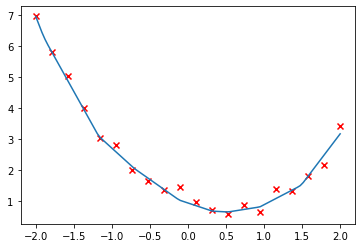

In [629]:
for i in range(500):
    # Afficher le travail en cours
    if (i < 100 and i % 10 == 0) or i % 100 == 0:
        model.display(xs)
        time.sleep(1)
    
    # 1. Prédire les résultats en utilisant le modèle dans son état actuel
    preds = model.predict_values(train_xs_input)

    # 2. Mesurer l'erreur de prédiction par rapport aux valeurs attendues
    error = model.measure_error(preds, train_ys_output)
    if i % 10 == 9:
        print(f"Error : {error}")

    # 3. Faire un pas d'ajustement des paramètres dans le sens de la réduction de l'erreur
    model.adjust_parameters(error, step_size = 1/1000)

# Afficher le résultat de l'amélioration
model.display(xs)

## Impact of the number of parameters

Initialized a model with 5 parameters


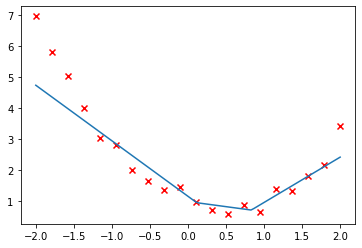

Initialized a model with 11 parameters


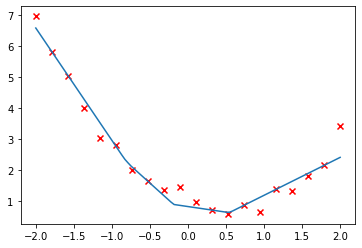

Initialized a model with 17 parameters


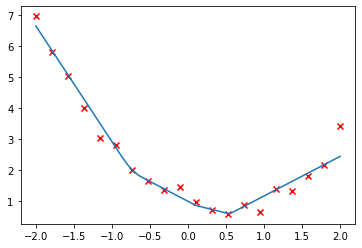

Initialized a model with 23 parameters


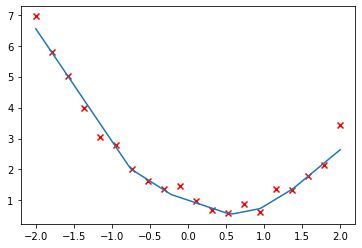

Initialized a model with 29 parameters


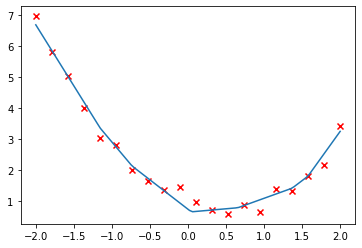

Initialized a model with 35 parameters


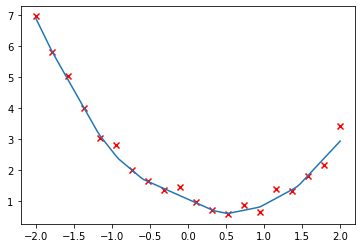

Initialized a model with 41 parameters


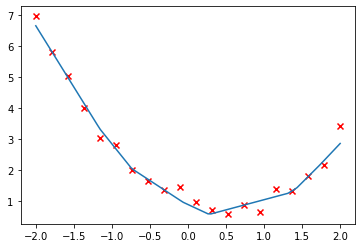

Initialized a model with 47 parameters


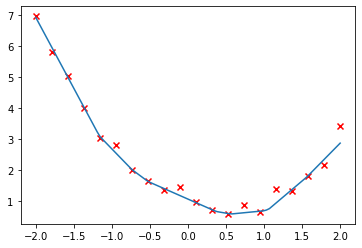

Initialized a model with 53 parameters


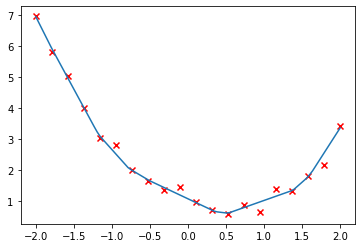

Initialized a model with 59 parameters


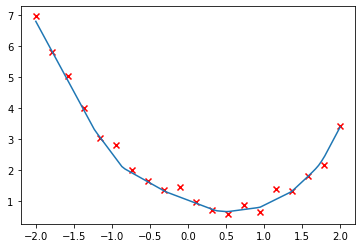

In [637]:
for num_segments in range(2, 30, 3):
    model = NeuralNetwork(num_segments = num_segments)

    for i in range(500):

        # 1. Prédire les résultats en utilisant le modèle dans son état actuel
        preds = model.predict_values(train_xs_input)

        # 2. Mesurer l'erreur de prédiction par rapport aux valeurs attendues
        error = model.measure_error(preds, train_ys_output)

        # 3. Faire un pas d'ajustement des paramètres dans le sens de la réduction de l'erreur
        model.adjust_parameters(error, step_size = 1/1000)

    # Afficher le résultat de l'amélioration
    model.display(xs)